In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  

from scipy.stats import spearmanr

In [3]:
fasta = "/s/genomes/human/hg19/ensembl_GRCh37.p13_release75/Homo_sapiens.GRCh37.75.dna.primary_assembly.fa"
GFF = "/s/genomes/human/hg19/MISO/A5SS.hg19.nochr.selected.gff3"
miso = "/s/project/gtex-processed/recods/Data/MISO/A5SS_psi.csv"

In [4]:
from dataloader import SplicingMaxEntDataset

from kipoi.data import DataLoader
from kipoi.data_utils import numpy_collate

from model import MaxEntModel

In [5]:
data = SplicingMaxEntDataset(GFF, fasta, side = "5prime", target_file = miso)

In [6]:
test = data[0]

test

{'inputs': {'seq': array(['GATGTACAA', 'TATGTAAAT'],
        dtype='<U9')},
 'metadata': {'chrom': '15',
  'geneName': 'chr15:42565276:42565087|42565161:-@chr15:42564261:42564321:-',
  'start': 42564261,
  'stop': 42565276,
  'strand': '-'},
 'targets': array([[  nan,   nan],
        [  nan,   nan],
        [ 0.51,  0.49]])}

In [7]:
from maxentpy import maxent
from maxentpy.maxent import load_matrix5, load_matrix3

In [8]:
matrix = load_matrix5()

In [9]:
maxent.score5("GAGGTTTGT", matrix=matrix)

6.362850039942325

In [10]:
maxent.score5("TAGGTAGGT", matrix=matrix)

7.9221592215723655

## Prediction

In [11]:
data_generator = DataLoader(data, batch_size=1000, collate_fn=numpy_collate, shuffle=False)
data_generator = iter(data_generator)
batch = next(data_generator)

In [12]:
batch['inputs']['seq']

array([['GATGTACAA', 'TATGTAAAT'],
       ['TTGGTAAGC', 'TGGTAAGCA'],
       ['GAAGTGAGT', 'AAGGTAGAA'],
       ..., 
       ['GAGGTAAAG', 'CTGGTGGTT'],
       ['CAGGTGAAC', 'AAGGTGAGA'],
       ['CAGGTGGGC', 'AAGGTTGCT']],
      dtype='<U9')

In [13]:
model = MaxEntModel(side = '5prime')

In [14]:
measured = batch['targets']

In [15]:
pred = model.predict_on_batch(batch)

(-20, 20)

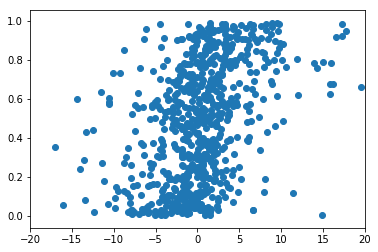

In [16]:
plt.scatter(pred, measured[:,0,0])
plt.xlim(-20, 20)

In [17]:
spearmanr(pred, measured[:,0,0], nan_policy='omit')

SpearmanrResult(correlation=0.47433941101144594, pvalue=masked_array(data = 4.0608008416681065e-43,
             mask = False,
       fill_value = 1e+20)
)